In [21]:
import logging
import geopandas as gpd
import matplotlib.pyplot as plt
from sliderule import icesat2
import icepyx as ipx
from pprint import pprint

import numpy as np
import datetime

In [22]:
lake = gpd.read_file('/home/jovyan/ICESat-2-Hackweek/GEE/Attabad-Lake.shp')

# projection to wgs84
lake_wgs84 = lake.to_crs(4326)

# get 

bounds = lake_wgs84.bounds

minx = float(bounds.minx) - 0.02
maxx = float(bounds.maxx) + 0.02
miny = float(bounds.miny) - 0.02
maxy = float(bounds.maxy) + 0.02

In [23]:
print(minx)
print(maxx)
print(miny)
print(maxy)

region = [ {"lon":maxx, "lat": maxy},
           {"lon":minx, "lat": maxy},
           {"lon":minx, "lat": miny},
           {"lon":maxx, "lat": miny},
           {"lon":maxx, "lat": maxy} ]

74.8020967078372
74.89618583060114
36.27957059676453
36.371622618097945


In [24]:
# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "maxi": 1
}

# Request ATL06 Data
gdf = icesat2.atl06p(parms)

# Display Statistics
print("Reference Ground Tracks: {}".format(gdf["rgt"].unique()))
print("Cycles: {}".format(gdf["cycle"].unique()))
print("Received {} elevations".format(len(gdf)))

Reference Ground Tracks: [1133 1217  775]
Cycles: [ 1  2  4  5  7  8  9 10 11 12 13 16]
Received 14912 elevations


(None,)

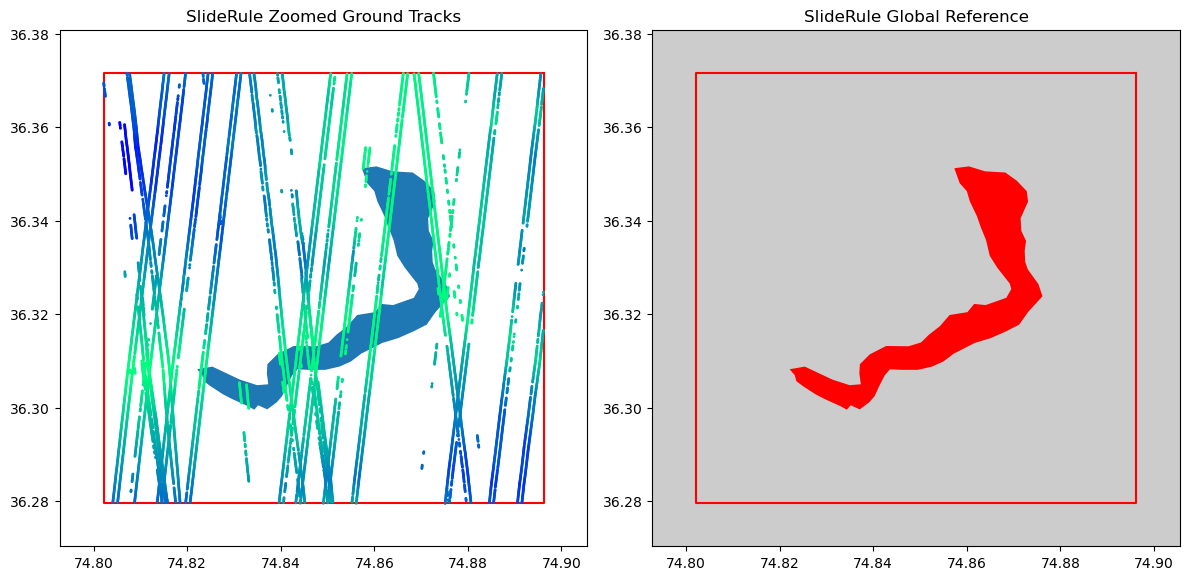

In [25]:
# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Create Plot
fig,(ax1,ax2) = plt.subplots(num=None, ncols=2, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax1.set_title("SlideRule Zoomed Ground Tracks")
gdf.plot(ax=ax1, column=gdf["h_mean"], cmap='winter_r', s=1.0, zorder=3000)
ax1.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
lake_wgs84.plot(ax=ax1, zorder=1000)
#glaciers_wgs84.plot(ax=ax1, facecolor='none') # linecolor='red'
ax1.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax1.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax1.set_aspect('equal', adjustable='box')

# Plot SlideRule Global View
ax2.set_title("SlideRule Global Reference")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax2, color='0.8', edgecolor='black')
#outline_wgs84.plot(ax=ax2)
ax2.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
lake_wgs84.plot(ax=ax2, lw=100, color='red')
#gdf.plot(ax=ax2, marker='o', color='red', markersize=2.5, zorder=3)
#gdf.plot()
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
ax2.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax2.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax2.set_aspect('equal', adjustable='box')

# Show Plot
plt.tight_layout(), 